# Project: Investigate a Dataset - [TMDb movie data]


<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: TMDb movie datan contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>**Tip**: Movies which has the most and least budgets.

>**Tip**: Movies which has the most and least earned revenue.

>**Tip**: Movies which has the most and least earned profit.

>**Tip**: years has most and least movies.

>**Tip**: comapny Most Producing Films.

>**Tip**: Year of release vs Profits earned.

>**Tip**: Movies has longest and shortest runtime.

>**Tip**: avarage runtime of the movies.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)


## Data Cleaning


In [5]:
#drop duplicated
df.drop_duplicates(keep ='first', inplace=True)


In [6]:
df.shape

(10865, 21)

In [8]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   imdb_id               3854 non-null   object 
 2   popularity            3854 non-null   float64
 3   budget                3854 non-null   int64  
 4   revenue               3854 non-null   int64  
 5   original_title        3854 non-null   object 
 6   cast                  3850 non-null   object 
 7   homepage              1426 non-null   object 
 8   director              3853 non-null   object 
 9   tagline               3574 non-null   object 
 10  keywords              3716 non-null   object 
 11  overview              3854 non-null   object 
 12  runtime               3854 non-null   int64  
 13  genres                3854 non-null   object 
 14  production_companies  3808 non-null   object 
 15  release_date        

In [10]:
#drop the useless data
df.drop(['id','popularity','cast','homepage','tagline','keywords','overview','budget_adj','release_date','revenue_adj','vote_count'], axis=1 ,inplace = True)
df.head()

,imdb_id,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,tt2820852,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               3854 non-null   object 
 1   budget                3854 non-null   int64  
 2   revenue               3854 non-null   int64  
 3   original_title        3854 non-null   object 
 4   director              3853 non-null   object 
 5   runtime               3854 non-null   int64  
 6   genres                3854 non-null   object 
 7   production_companies  3808 non-null   object 
 8   vote_average          3854 non-null   float64
 9   release_year          3854 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 331.2+ KB


In [170]:
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,6.168163,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,0.794920,11.282575
min,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,5.700000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,6.200000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000


In [12]:
df["profit"] = df["revenue"] - df["budget"] 
df.head()

,imdb_id,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year,profit
0,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
1,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354
2,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225
4,tt2820852,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360



## Exploratory Data Analysis


In [13]:
def calculate(column):
    #for highest
    high= df[column].idxmax()
    high_detail=pd.DataFrame(df.loc[high])
    
    #for lowest
    low= df[column].idxmin()
    low_detail=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_detail, low_detail], axis=1)
    
    return info

## 1st Question: Movies which has the most and least budgets

In [14]:
calculate('budget')

,2244,2618
imdb_id,tt1032751,tt0120836
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
vote_average,6.4,4.8
release_year,2010,1999


In [15]:
# avarge budget
df['budget'].mean()

37203696.954852104

## 2nd Question: Movies which has the most and least earned revenue

In [16]:
calculate('revenue')

,1386,5067
imdb_id,tt0499549,tt0323944
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
vote_average,7.1,6.4
release_year,2009,2003


## 3rd Question: Movies which has the most and least earned profit

In [17]:
calculate('profit')

,1386,2244
imdb_id,tt0499549,tt1032751
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
vote_average,7.1,6.4
release_year,2009,2010


## 4th Question: years has most and least movies

In [18]:
#the most year has movies
df['release_year'].value_counts().idxmax()

2011

In [19]:
# the least year has movies
df['release_year'].value_counts().idxmin()

1969

## 5th Question: comapny Most Producing Films

In [20]:
df['production_companies'].value_counts().idxmax()


'Paramount Pictures'

## 6th Question: Genres vs Profits earned

In [37]:
#the max genre 
profits_genre = df.groupby('genres')['profit'].sum().idxmax()
print(profits_genre)

Comedy


In [39]:
#the min genre 
profits_genre = df.groupby('genres')['profit'].sum().idxmin()
print(profits_genre)

Adventure|Fantasy|Action|Western|Thriller


Text(0.5, 0, 'Release profit of Movies in the data set')

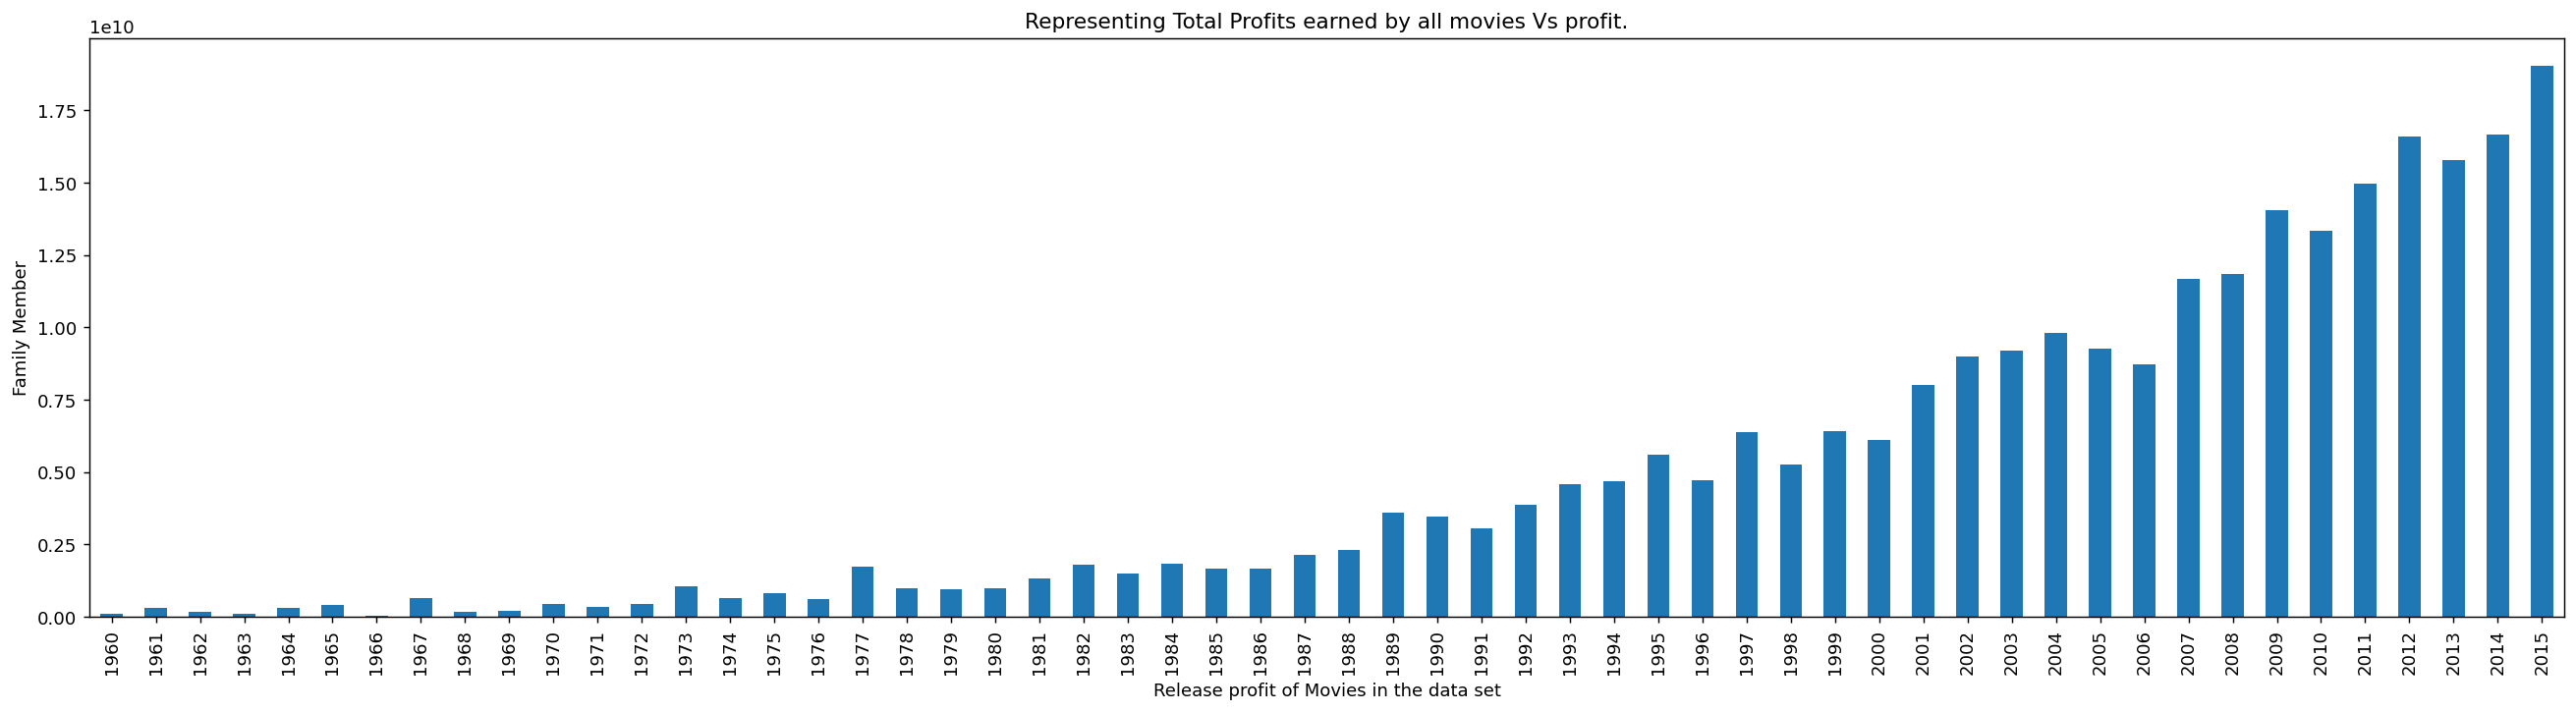

In [97]:
plt.figure(figsize=(25,6), dpi = 130)
df.groupby('release_year')['profit'].sum().plot(kind="bar")
plt.title("Representing Total Profits earned by all movies Vs profit.")
plt.ylabel("Family Member")
plt.xlabel("Release profit of Movies in the data set")

## 7th Question: Movies has max and min profit


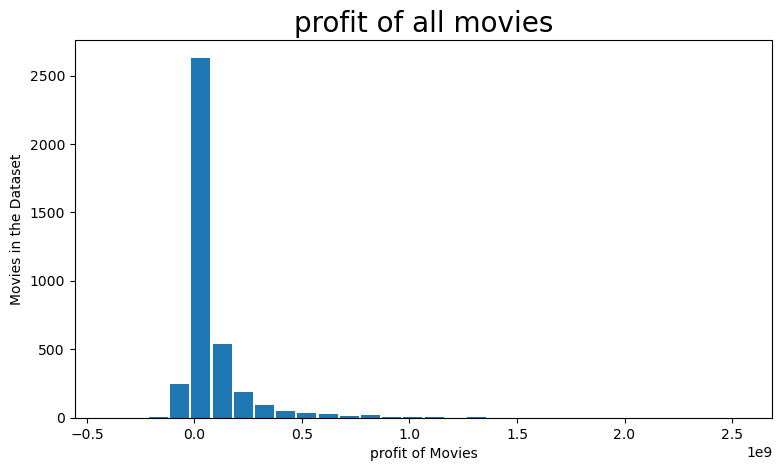

In [56]:
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#Name of the graph
plt.title('profit of all movies', fontsize=20)
# x-axis 
plt.xlabel('profit of Movies', fontsize = 10)
# y-axis 
plt.ylabel('Movies in the Dataset', fontsize=10)

#giving a histogram plot
plt.hist(df['profit'], rwidth = 0.9, bins =30)
plt.show()

 Most of the movies are eaned between -0.1 to 0.5 % . Almost 2500 and more no.of movies fall in this criteria.

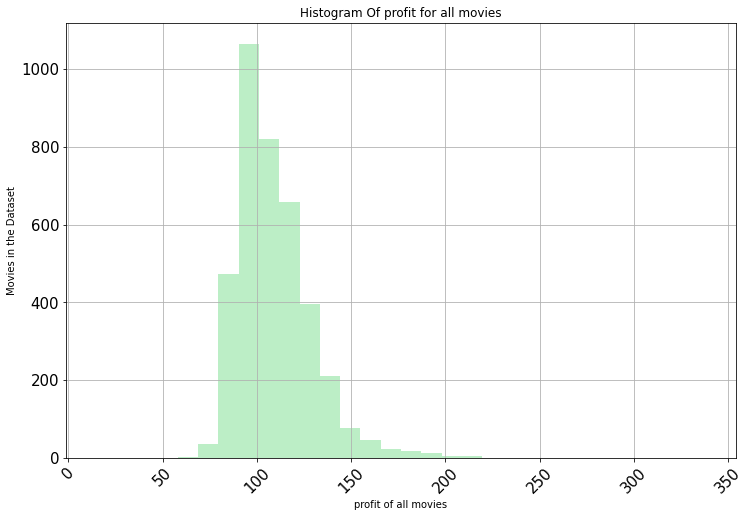

In [82]:
df['runtime'].plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of profit for all movies',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF', '#FFCF56'])
plt.xlabel('profit of all movies')
plt.ylabel("Movies in the Dataset");

Most of the movies are timed between 80 to 109 minutes. Almost 1000 and more no.of movies fall in this criteria.

In [22]:
calculate('runtime')

,2107,5162
imdb_id,tt1321865,tt0368574
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
vote_average,6.2,6.8
release_year,2010,2003


## 8th Question: avarage runtime of the movies

In [23]:
df['runtime'].mean()

109.22029060716139

In [ ]:
from matplotlib.patches import Patch
colours = {"male": "#273c75", "female": "#44bd32"}
df['runtime'].plot(
        kind="pie", color=df['movies'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['male']),
        Patch(facecolor=colours['female'])
    ], ["male", "female"]
)
plt.title("Mince Pie Consumption")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

### plotting a histogram of runtime of movies

In [28]:
df["profit_percentage"] = (df['profit'] / df['budget'])*100

In [29]:
df.head()

,imdb_id,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year,profit,profit_percentage
0,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810,909.019207
1,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354,152.290903
2,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201,168.398365
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225,934.089113
4,tt2820852,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360,692.762821


In [30]:
df["profit_percentage"].mean()

29704.122285498517

In [31]:
df.describe()

,budget,revenue,runtime,vote_average,release_year,profit,profit_percentage
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,3.720370e+07,1.076866e+08,109.220291,6.168163,2001.261028,7.048292e+07,2.970412e+04
std,4.220822e+07,1.765393e+08,19.922820,0.794920,11.282575,1.506195e+08,1.644256e+06
min,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000,-4.139124e+08,-9.999998e+01
25%,1.000000e+07,1.360003e+07,95.000000,5.700000,1995.000000,-1.321535e+06,-1.234118e+01
50%,2.400000e+07,4.480000e+07,106.000000,6.200000,2004.000000,2.002019e+07,1.119690e+02
75%,5.000000e+07,1.242125e+08,119.000000,6.700000,2010.000000,8.170331e+07,3.210444e+02
max,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000,2.544506e+09,1.018618e+08


<a id='conclusions'></a>
## Conclusions
### For a Movie to be in successful 
> **Tip**: Average duration of the movie must be 109 minutes

> **Tip**: the successful genre of movies is the Comedy and failure one is the Western. so Genre shoud be Comedy, Action, Adventure, Thriller, Dram if Thriller only you will lose  

> **Tip**: Avarage budget to produse movie is 37203696.95

> **Tip**: Avarage profit_percentage to should earn 29704 % from your budget

## Limitations 
>when many rows have 0 or NAN values like 'budget', 'revenue' thats reduce the data from 10864 to 3853 only. so the data should be more than completed.
